In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
import time

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.FashionMNIST('Data_FashionMNIST/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('DATA_FashionMNIST/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

cuda


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


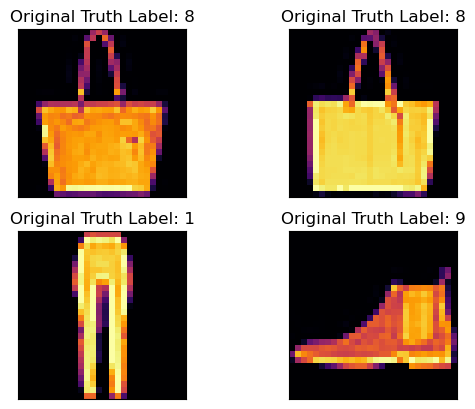

In [3]:
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)
print(type(images))
print(images.shape)
print(labels.shape)

fig = plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Original Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])
plt.show()

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Tranfer Learning

In [13]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 16, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 4, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 1, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(28*28, 100),  # Adjusted to match the size of the input to the decoder linear layer
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(100, 784),  # Adjusted to match the size of the input to the decoder
            nn.ReLU(),
            nn.Unflatten(1, (1, 28, 28)),  # This is okay
            nn.ConvTranspose2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Upsample(scale_factor=7, mode='nearest'),
            nn.ConvTranspose2d(32, 16, kernel_size=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [39]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 16, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 4, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 1, kernel_size=2, padding=1),
            nn.ReLU(),
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Upsample(scale_factor=7, mode='nearest'),
            nn.ConvTranspose2d(32, 16, kernel_size=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Encoder
        for layer in self.encoder:
            x = layer(x)
            print(x.shape)  # Print shape after each layer in encoder
        
        # Decoder
        for layer in self.decoder:
            x = layer(x)
            print(x.shape)
        return x

In [40]:
# Example usage
autoencoder = Autoencoder()
x = torch.randn(1, 1, 28, 28)  # Example input image
output = autoencoder.forward(x)
print("Output shape:", output.shape)
#x = torch.randn(1, 1, 10, 10)  # Example input image
#output = autoencoder.decoder(x)
#print("Output shape:", output.shape)

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 32, 14, 14])
torch.Size([1, 32, 14, 14])
torch.Size([1, 32, 14, 14])
torch.Size([1, 32, 14, 14])
torch.Size([1, 32, 14, 14])
torch.Size([1, 32, 15, 15])
torch.Size([1, 32, 15, 15])
torch.Size([1, 32, 7, 7])
torch.Size([1, 32, 7, 7])
torch.Size([1, 16, 8, 8])
torch.Size([1, 16, 8, 8])
torch.Size([1, 4, 9, 9])
torch.Size([1, 4, 9, 9])
torch.Size([1, 1, 10, 10])
torch.Size([1, 1, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 10, 10])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 20, 20])
torch.Size([1, 32, 140, 140])
torch.

In [ ]:
# Plot the training loss over epochs
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


Original images


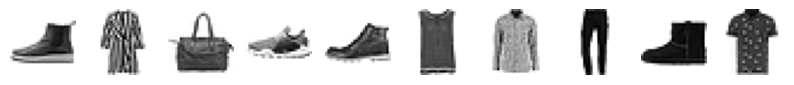

Reconstructed images


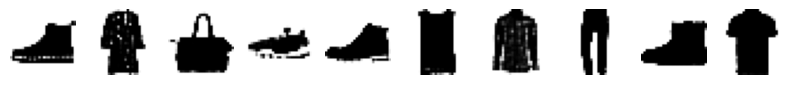

In [7]:
# Get a batch of test images
dataiter = iter(testLoader)
images, labels = next(dataiter)

# Show original images
plt.figure(figsize=(10, 4))
print('Original images')
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
    plt.axis('off')
plt.show()

# Show reconstructed images
with torch.no_grad():
    images = images.to(device)
    outputs = model(images)
    outputs = outputs.cpu()
    plt.figure(figsize=(10, 4))
    print('Reconstructed images')
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(outputs[i].numpy().squeeze(), cmap='gray_r')
        plt.axis('off')
    plt.show()



In [14]:
from sklearn.mixture import GaussianMixture

# Get latent space representations for training data
latent_vectors = []
with torch.no_grad():
    for data in trainLoader:
        images, _ = data
        images = images.to(device)
        latent_vector = model.encoder(images).view(images.size(0), -1).cpu().numpy()
        latent_vectors.append(latent_vector)
latent_vectors = np.concatenate(latent_vectors)

# Fit a Gaussian Mixture Model
n_components = 18  # Adjust the number of components as needed
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(latent_vectors)


GaussianMixture(n_components=18)

/home/daniel/anaconda3/envs/deep/lib/python3.9/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/daniel/anaconda3/envs/deep/lib/python3.9/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


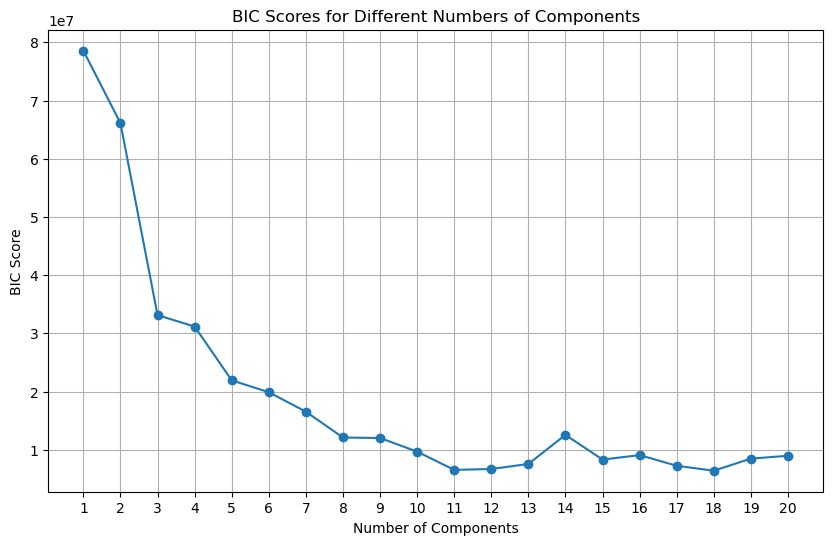

Optimal number of components: 18


In [56]:
# Initialize list to store BIC scores
bic_scores = []
num_components_range = range(2, 21)
# Try different numbers of components
for n_components in num_components_range:  # Adjust the range as needed
    # Fit GMM with current number of components
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(latent_vectors)  # Assuming latent_vectors is already computed
    
    # Calculate BIC score
    bic = gmm.bic(latent_vectors)
    bic_scores.append(bic)

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(num_components_range, bic_scores, marker='o', linestyle='-')
plt.title('BIC Scores for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.xticks(num_components_range)
plt.grid(True)
plt.show()

# Find the optimal number of components with minimum BIC score
optimal_components = np.argmin(bic_scores) + 1  # +1 to account for 0-based indexing
print("Optimal number of components:", optimal_components)


In [12]:
# Get a sample input image
sample_input, _ = next(iter(trainLoader))
sample_input = sample_input.to(device)

# Pass the sample input through the encoder
with torch.no_grad():
    encoder_output = model.encoder(sample_input)

# Print the shape of the encoder output
print("Encoder output shape:", encoder_output.shape)
chanels = encoder_output.shape[1]
hight, wight = encoder_output.shape[2],encoder_output.shape[3]
hight

Encoder output shape: torch.Size([64, 8, 7, 7])


7

Generated images


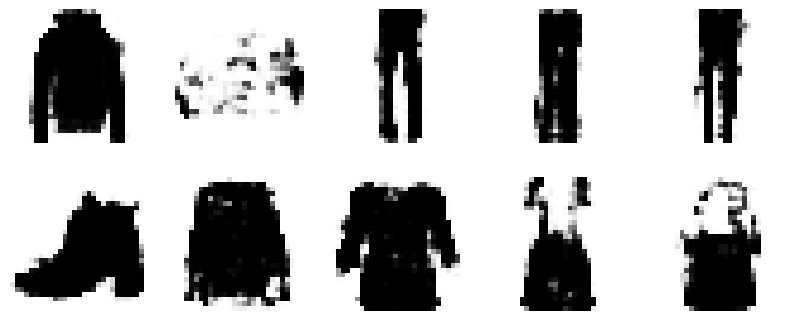

In [15]:
# Sample from the GMM
latent_samples = gmm.sample(10)  # Generate 10 samples
latent_samples = latent_samples[0]  # Extract samples

# Convert samples to torch tensor
latent_samples = torch.from_numpy(latent_samples).float().to(device)

# Generate images from sampled latent vectors
with torch.no_grad():
    generated_images = model.decoder(latent_samples.view(-1, chanels, hight, wight))  
    generated_images = generated_images.cpu()


# Visualize generated images
plt.figure(figsize=(10, 4))
print('Generated images')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i].numpy().squeeze(), cmap='gray_r')
    plt.axis('off')
plt.show()
